# British Airways Predicting Customer Behaviours

### Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [37]:
# Web scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    parsed_content = BeautifulSoup(response.content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text().strip())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [38]:
# Save data to DataFrame
df = pd.DataFrame({'reviews': reviews})
df.to_csv("data/britishairways_review.csv", index=False)

In [39]:
# Load data for processing
data = pd.read_csv("data/britishairways_review.csv")

### Data Cleaning

In [40]:
# Data cleaning
data['reviews'] = data['reviews'].str.replace(r'Not Verified|Trip Verified', '', regex=True)
data['reviews'] = data['reviews'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))  # Remove emojis

In [41]:
# Sentiment analysis
data['sentiment'] = data['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [42]:
# Categorizing sentiments
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

In [43]:
# Count sentiment categories
sentiment_counts = data['sentiment_category'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_37856\2702480341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])


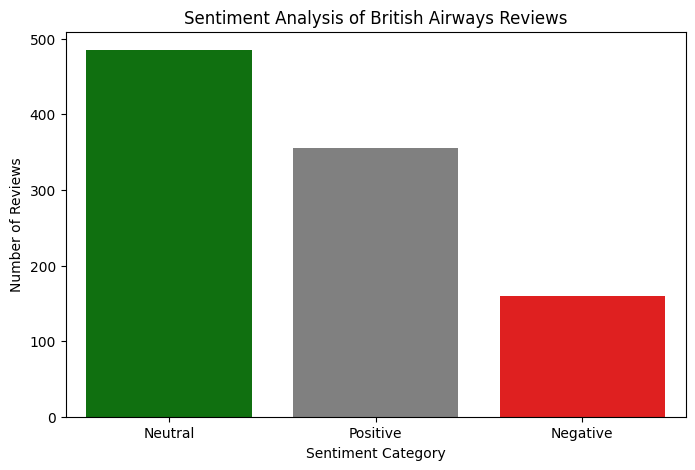

In [45]:
# Assuming sentiment_counts is a pandas Series with sentiment categories and their counts
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])

# Adding labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of British Airways Reviews')

# Show plot
plt.show()

In [34]:
#copy data 
data1 = data_ba.copy()

In [ ]:
## Analyze 